# EP 3.1 -  Visão e Processamento de Imagens

###Integrantes do grupo:

-> Ciro Akiyoshi Higashi - nusp:10736858

-> Lucas Giannella de Oliveira - nusp:10336021

-> Link do Git: https://github.com/Cirokun/MAC0417-MAC5768

-> Link para o Google Drive: https://drive.google.com/drive/folders/18tiGKyk2206Kd_v0qlBazA4Hcn5zeODi?usp=sharing

## Importação de bibliotecas

In [ ]:
import os
import re
import sys
import math
import cv2
import random
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import canny
from skimage import io, color, exposure, filters, transform,measure,morphology

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/MAC5768/EPs')

## Leitura das Imagens segmentadas manualmente

In [ ]:
imgs_segManual = io.imread_collection("SegManual/*.jpg")

### Exemplos da segmantação manual

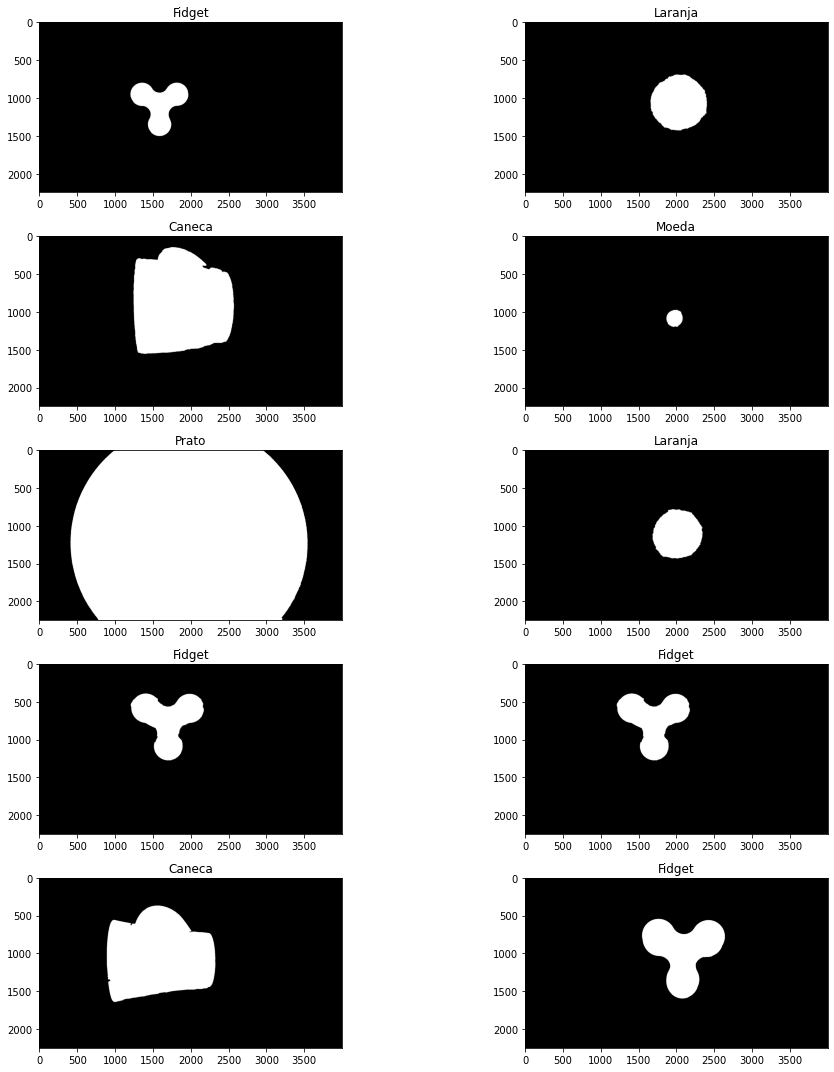

In [ ]:
M=len(imgs_segManual.files)-1
fig, ax = plt.subplots(5,2,figsize=(15, 15))
for i in range(5):
  f=random.randint(0, M)
  k=random.randint(0, M)
  ax[i,0].imshow(imgs_segManual[f],cmap="Greys_r")
  ax[i,0].title.set_text((((os.path.splitext(imgs_segManual.files[f])[0]).split("/")[1]).split("_")[0])[:-1])
  ax[i,1].imshow(imgs_segManual[k],cmap="Greys_r")
  ax[i,1].title.set_text((((os.path.splitext(imgs_segManual.files[k])[0]).split("/")[1]).split("_")[0])[:-1])
plt.tight_layout()
plt.show()

### Leitura do dataset aumentado
Neste trecho o dataset aumentdao é lido e preparado para a segmentacao automatica

In [ ]:
imgs_full = io.imread_collection("AugData/*.jpg:GryData/*.jpg")

### Segmentação Automatica
escolhemos fazer a segmentacao automatica em 3 etapas:

1- extração de bordas utilizando um filtro Canny

2- busca do contorno externo utilizando a findContours da OpenCV

3- preenchimento do contorno encontrado

Desta forma tesmos a borda extena dos objetos detectadas e preenchidas gerando a segmentação automatica

In [ ]:
## NÃO RODAR DE NOVO ##
N=len(imgs_full.files)

for n in range(N):
  pt=os.path.splitext(imgs_full.files[n])[0]
  nome=pt.split("/")[1]
  edges = canny(imgs_full[n]/255.,sigma=3)

  mask = morphology.disk(10)
  closed = morphology.dilation(edges,mask)

  segmented=(closed*255).astype(np.uint8)
  cnts = cv2.findContours(segmented, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]

  for c in cnts:
      cv2.drawContours(segmented,[c], 0, (255,255,255), -1)
  io.imsave("SegAuto/"+nome+"_AutoSeg.jpg",segmented)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: SegAuto/Caneca1_In_D_A_1_aug_med_AutoSeg.jpg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: SegAuto/Caneca1_In_D_A_2_aug_med_AutoSeg.jpg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: SegAuto/Caneca1_In_D_A_3_aug_med_AutoSeg.jpg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: SegAuto/Caneca1_In_D_B_1_aug_med_AutoSeg.jpg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: SegAuto/Caneca1_In_D_B_2_aug_med_AutoSeg.jpg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: SegAuto/Caneca1_In_D_B_3_aug_med_AutoSeg.jpg is a low contrast image
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: SegAuto/Caneca1_In_D_C_1_aug_med_AutoSeg

### Leitura das imagens segamentadas automaticamente

In [ ]:
imgs_segAuto = io.imread_collection("SegAuto/*.jpg")

### Exibição das imagens segmentadas automaticamente

Uma amostra aleatoria da imagens segmentadas no trecho anterios é plotada para fins de vizualização.

A partir desta amostra podemos ver que em alguns casos a abordagem escolhida funcionou muito bem, porém em varios outros casos o resultado da segmentação ficou aquem do ideal.

Estes problemas serão refletidos na hora de treinar o classificador

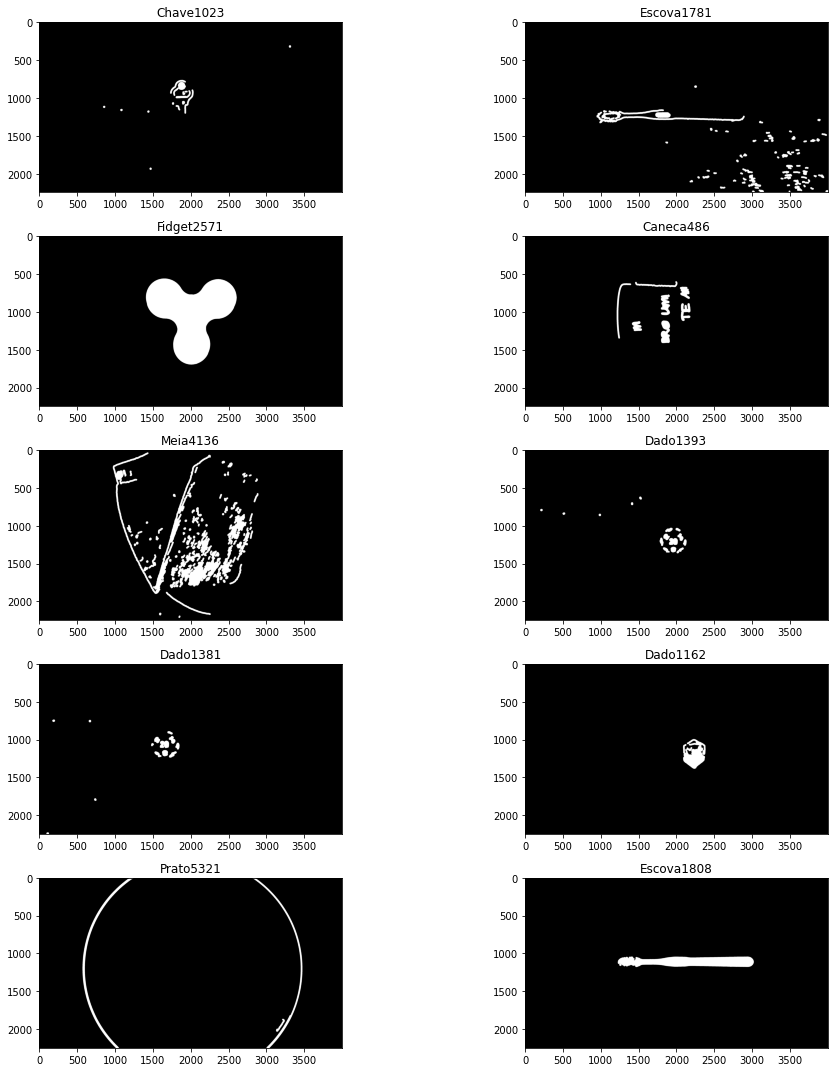

In [ ]:
N=len(imgs_segAuto.files)-1
fig, ax = plt.subplots(5,2,figsize=(15, 15))
for i in range(5):
  f=random.randint(0, N)
  k=random.randint(0, N)
  ax[i,0].imshow(imgs_segAuto[f],cmap="Greys_r")
  ax[i,0].title.set_text((((os.path.splitext(imgs_segAuto.files[f])[0]).split("/")[1]).split("_")[0])[:-1]+f"{f}")
  ax[i,1].imshow(imgs_segAuto[k],cmap="Greys_r")
  ax[i,1].title.set_text((((os.path.splitext(imgs_segAuto.files[k])[0]).split("/")[1]).split("_")[0])[:-1]+f"{k}")
plt.tight_layout()
plt.show()